In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import re
import math

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('final_dataset_chronic_illlness_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,user_id,age,sex,country,checkin_date,trackable_value,Condition,Symptom,Weather,Treatment,Tag,Food,HBI,intensity_cond_symp,time_interval,max_intensity_per_day_,age_cat
0,0,0,21.0,female,CA,2018-07-17,NaN,NaN,abdominal pain,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,age_q1
1,1,0,21.0,female,CA,2018-07-17,NaN,diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4.0,age_q1
2,2,0,21.0,female,CA,2018-07-17,NaN,upset stomach,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,4.0,age_q1
3,3,0,21.0,female,CA,2018-07-17,NaN,dizzyness,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,4.0,age_q1
4,4,0,21.0,female,CA,2018-07-17,NaN,chron's disease,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,4.0,age_q1


In [8]:
import datetime
df.checkin_date = list(map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'), df.checkin_date))

In [9]:
df['weekday'] = list(map(lambda x: x.weekday(), df.checkin_date))

In [12]:
df.head()

,Unnamed: 0,user_id,age,sex,country,checkin_date,trackable_value,Condition,Symptom,Weather,Treatment,Tag,Food,HBI,intensity_cond_symp,time_interval,max_intensity_per_day_,age_cat,weekday
0,0,0,21.0,female,CA,2018-07-17,NaN,NaN,abdominal pain,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,age_q1,1
1,1,0,21.0,female,CA,2018-07-17,NaN,diarrhea,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4.0,age_q1,1
2,2,0,21.0,female,CA,2018-07-17,NaN,upset stomach,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,4.0,age_q1,1
3,3,0,21.0,female,CA,2018-07-17,NaN,dizzyness,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,4.0,age_q1,1
4,4,0,21.0,female,CA,2018-07-17,NaN,chron's disease,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,4.0,age_q1,1


In [ ]:
#que día de la semana repoortan más

#cargarme todas las que no tienen condición, ni tratamiento ni síntomas fuera.

# Reports frequency

In [15]:
# Most reportings in 0-Monday.
# During the weekends the people report less.
df['weekday'].value_counts()

0    1179339
1    1178289
2    1168329
3    1148620
6    1126422
4    1092221
5    1083003
Name: weekday, dtype: int64

In [18]:
month_track = list(map(lambda x: x.month, df.checkin_date))

In [173]:
df['month'] = month_track

In [31]:
# Most reports are on october. 
# In winter there are less reports(12,1,2).
from collections import Counter

pd.DataFrame.from_dict(dict(Counter(month_track)), orient='index').sort_values(by=0,ascending=False)

,0
10,808150
11,771949
9,761929
8,732345
7,710402
6,664222
5,650329
3,636764
4,604648
1,589474


In [32]:
year_track = list(map(lambda x: x.year, df.checkin_date))

In [34]:
# There have been more reports in 2018 and 2019. In 2017 reports were the half from the next year.
pd.DataFrame.from_dict(dict(Counter(year_track)), orient='index').sort_values(by=0,ascending=False)

,0
2019,3080399
2018,2858893
2017,1488721
2016,345054
2015,203052
2013,49
2014,30
2012,25


In [36]:
df['year'] = year_track

# Users Frequency

In [50]:
# Unique users per year
# 2018 was the year with most unique users. In 2019 unique users go down a bit.
df.groupby(['year'])['user_id'].nunique()

year
2012        1
2013        1
2014        1
2015      681
2016     2638
2017    11903
2018    16034
2019    15977
Name: user_id, dtype: int64

In [58]:
# Users use the app more on tuesdays and mondays and sundays.
df.groupby(['weekday'])['user_id'].nunique().sort_values(ascending=False)

weekday
2    17306
1    17280
0    17064
3    16861
6    16201
4    15913
5    15368
Name: user_id, dtype: int64

In [60]:
# percentage of users per day
total_users = len(set(df.user_id))
df.groupby(['weekday'])['user_id'].nunique().sort_values(ascending=False) / total_users * 100

weekday
2    40.928979
1    40.867488
0    40.356645
3    39.876546
6    38.315635
4    37.634510
5    36.345576
Name: user_id, dtype: float64

# Users demographic

In [65]:
# AGE
# Users ages percentage
total_users = len(set(df.user_id))
df.groupby(['age_cat'])['user_id'].nunique().sort_values(ascending=False) /  total_users * 100

age_cat
age_q1    29.766100
age_q2    26.164179
age_q3    21.545302
age_q4    18.518081
Name: user_id, dtype: float64

In [77]:
print('Age_q1 goes from to:',min(df[df['age_cat'] == 'age_q1']['age'].values), max(df[df['age_cat'] == 'age_q1']['age'].values))

print('Age_q2 goes from to:',min(df[df['age_cat'] == 'age_q2']['age'].values), max(df[df['age_cat'] == 'age_q2']['age'].values))

print('Age_q3 goes from to:',min(df[df['age_cat'] == 'age_q3']['age'].values), max(df[df['age_cat'] == 'age_q3']['age'].values))

print('Age_q4 goes from to:',min(df[df['age_cat'] == 'age_q4']['age'].values), max(df[df['age_cat'] == 'age_q4']['age'].values))

Age_q1 goes from to: 1.0 26.0
Age_q2 goes from to: 27.0 34.0
Age_q3 goes from to: 35.0 43.0
Age_q4 goes from to: 44.0 99.0


In [ ]:
# Almost 30% of users are less than 26 years old.
# 26% are between 27 and 34.
# So, almost 56% of users are less than 35 years old.

In [75]:
# GENDER
# Almost 82% of the users are females while just an 8% there are men.
# There is a huge class imbalance to predict by gender. ¿?¿?¿?¿
df.groupby(['sex'])['user_id'].nunique() /  total_users * 100

sex
doesnt_say     3.878627
female        81.969113
male           8.270463
other          2.838020
Name: user_id, dtype: float64

In [76]:
# Males from age_q2 (27-34) are the most common age category while for females the most age category is in age_q1 (0-26).
df[df['sex'].isin(['female','male'])].groupby(['age_cat','sex'])['user_id'].nunique() /  total_users * 100

age_cat  sex   
age_q1   female    24.591443
         male       1.795048
age_q2   female    22.108176
         male       2.154530
age_q3   female    17.957572
         male       2.029184
age_q4   female    14.987111
         male       2.083580
Name: user_id, dtype: float64

In [79]:
# COUNTRY
# More than half of our users (55.67%) are from the US. Followed by a 14.5% from GB and CA and AU with a 6 and 5%, resp.
df.groupby(['country'])['user_id'].nunique().sort_values(ascending=False) /  total_users * 100

country
US    55.696143
GB    14.537757
CA     6.714282
AU     5.742260
NZ     1.078448
        ...    
KZ     0.002365
SC     0.002365
BZ     0.002365
BW     0.002365
PG     0.002365
Name: user_id, Length: 164, dtype: float64

In [85]:
# Every country has an importan gender imbalance. Most females than males.
# But, in the US there are around 12 times more women than men.
top_countries = df[df['country'].isin(['US','GB','CA','AU'])]
top_countries[top_countries['sex'].isin(['female','male'])].groupby(['country','sex'])['user_id'].nunique() /  total_users * 100

country  sex   
AU       female     4.848284
         male       0.456448
CA       female     5.616915
         male       0.515574
GB       female    12.305182
         male       1.395360
US       female    47.808812
         male       3.970863
Name: user_id, dtype: float64

In [94]:
# Choosing US as our prinipall market we can see that there is not to much difference between ages categories.
# Although in females most commons users are between 0-26 years old while males most common users are btwn 27-34.
users_by_demographs = pd.DataFrame(top_countries[top_countries['sex'].isin(['female','male'])].groupby(['country','sex','age_cat'])['user_id'].nunique() /  total_users * 100).reset_index()
users_by_demographs[users_by_demographs['country'] == 'US']

,country,sex,age_cat,user_id
24,US,female,age_q1,14.015089
25,US,female,age_q2,12.432893
26,US,female,age_q3,10.649670
27,US,female,age_q4,9.443512
28,US,male,age_q1,0.851406
29,US,male,age_q2,1.007497
30,US,male,age_q3,0.946007
31,US,male,age_q4,1.059527


# Symptoms frequency

In [100]:
# From top_countries and everywhere the most common symptoms by users are:
top_countries.groupby(['Symptom'])['user_id'].nunique().sort_values(ascending=False).head(10)

Symptom
fatigue           16361
headache           9047
abdominal pain     7551
back pain          7439
joint pain         6818
nausea             6273
brain fog          5088
anxiety            4973
dizziness          4376
diarrhea           3531
Name: user_id, dtype: int64

In [101]:
df.groupby(['Symptom'])['user_id'].nunique().sort_values(ascending=False).head(10)

Symptom
fatigue           19209
headache          10629
abdominal pain     8920
back pain          8699
joint pain         7811
nausea             7216
brain fog          5845
anxiety            5761
dizziness          5062
diarrhea           4082
Name: user_id, dtype: int64

# Condition frequency

In [102]:
# From top_countries and everywhere the most common conditioons by users are:
df.groupby(['Condition'])['user_id'].nunique().sort_values(ascending=False).head(10)

Condition
fibromyalgia                                 8303
anxiety                                      6427
depression                                   6267
chron's disease                              5731
chronic fatigue syndrome                     3465
fatigue                                      2944
arthritis                                    2781
migraine                                     2729
postural orthostatic tachycardia syndrome    2549
endometriosis                                2312
Name: user_id, dtype: int64

# Pain intensity through different periods
### Does the pattern changes during the weekend? For example.

In [164]:
x = round((df.groupby(['weekday','intensity_cond_symp'])['user_id'].nunique()/ total_users * 100),2).reset_index().sort_values(by=['weekday','user_id'],ascending=[True,False])

<AxesSubplot:xlabel='weekday', ylabel='user_id'>

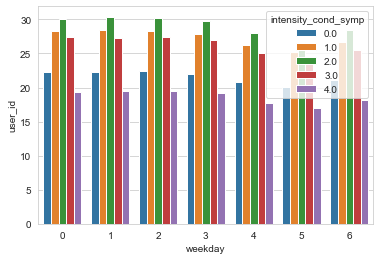

In [170]:
sns.barplot(data = x.reset_index(), x = 'weekday', y = 'user_id', hue='intensity_cond_symp')

In [ ]:
# we can see that the behavior of intensity of pain felt by the user doesn't change drastically from
# one day to another.
# The higher intensity is always 2 followed by 1 and 3, while intensity 4 is the less suffered every day.

<AxesSubplot:xlabel='year', ylabel='user_id'>

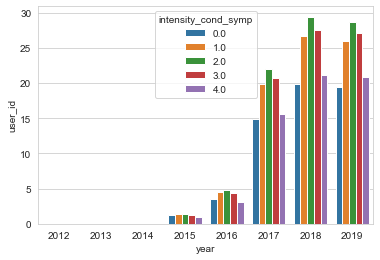

In [172]:
a = round((df.groupby(['year','intensity_cond_symp'])['user_id'].nunique()/ total_users * 100),2).reset_index().sort_values(by=['year','user_id'],ascending=[True,False])

sns.barplot(data = a.reset_index(), x = 'year', y = 'user_id', hue='intensity_cond_symp')

<AxesSubplot:xlabel='month', ylabel='user_id'>

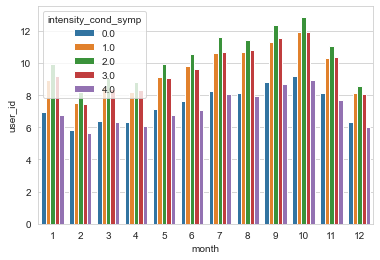

In [174]:
b = round((df.groupby(['month','intensity_cond_symp'])['user_id'].nunique()/ total_users * 100),2).reset_index().sort_values(by=['month','user_id'],ascending=[True,False])

sns.barplot(data = b.reset_index(), x = 'month', y = 'user_id', hue='intensity_cond_symp')

In [ ]:
# There is no pattern between the time an the pain intensity. It always have the same behaviour.

# Day with more reports

In [185]:
# sunday is the day with more reprts while thursday and saturday are the days with less reports.
df.groupby(['weekday'])['intensity_cond_symp'].count().reset_index().sort_values(by='intensity_cond_symp',ascending=False)

,weekday,intensity_cond_symp
0,0,711806
1,1,709087
2,2,703033
3,3,690078
6,6,678084
4,4,655311
5,5,648826


In [206]:
c = df[df['Condition'] == 'ibs']
d = c[c['year'].isin([2017,2018,2019])].groupby(['year','month'])['user_id'].nunique().reset_index().sort_values(by=['year','month'],ascending=[True,True])
d

,year,month,user_id
0,2017,1,44
1,2017,2,35
2,2017,3,36
3,2017,4,40
4,2017,5,40
5,2017,6,40
6,2017,7,52
7,2017,8,62
8,2017,9,104
9,2017,10,140


<AxesSubplot:xlabel='month', ylabel='user_id'>

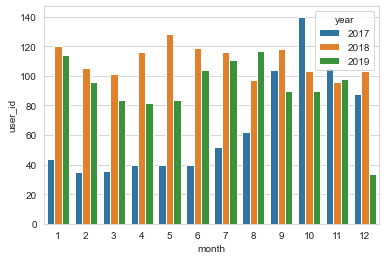

In [203]:
# número de usuarios por mes y año que padecen ibs
sns.barplot(data = d.reset_index(), x = 'month', y = 'user_id', hue='year')

In [211]:
e = df[df['Condition'] == 'ibs']
f = e[e['year'].isin([2017,2018,2019])].groupby(['year','intensity_cond_symp'])['user_id'].nunique().reset_index().sort_values(by=['year','intensity_cond_symp'],ascending=[True,True])
f

,year,intensity_cond_symp,user_id
0,2017,0.0,166
1,2017,1.0,274
2,2017,2.0,264
3,2017,3.0,203
4,2017,4.0,140
5,2018,0.0,263
6,2018,1.0,411
7,2018,2.0,439
8,2018,3.0,335
9,2018,4.0,200


<AxesSubplot:xlabel='intensity_cond_symp', ylabel='user_id'>

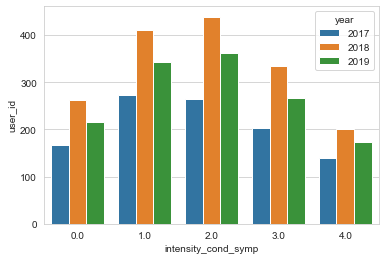

In [212]:
# número de usuarios por dolor que padecen ibs
sns.barplot(data = f.reset_index(), x = 'intensity_cond_symp', y = 'user_id', hue='year')

# pain evolution throught the most important years in the main symptoms

In [330]:
top_symptoms = list(df.Symptom.value_counts().head(10).index)
df['top_symptoms'] = np.where(df['Symptom'].isin(top_symptoms),df['Symptom'],'Other')

<AxesSubplot:xlabel='top_symptoms', ylabel='intensity_cond_symp'>

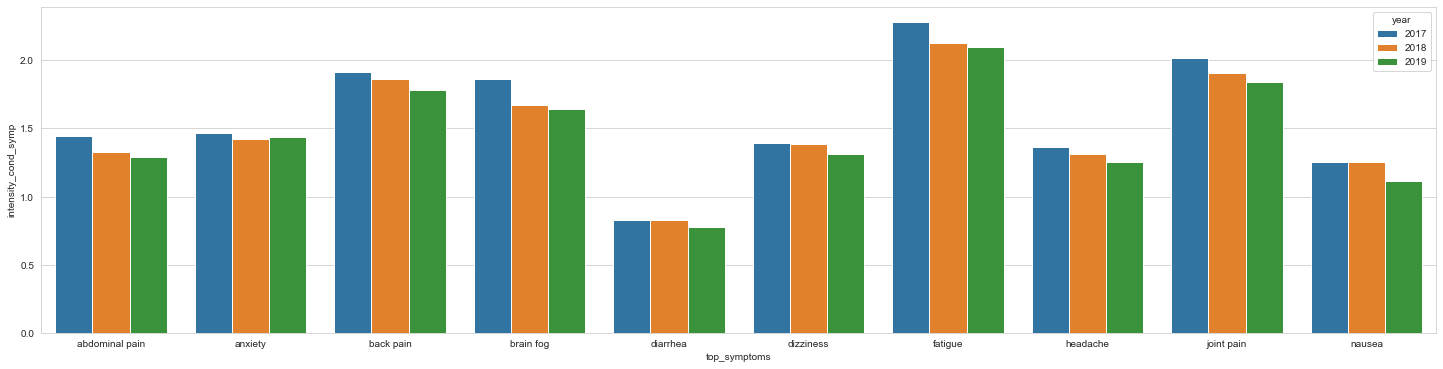

In [331]:
# intensidad media de dolor por s´ntoma
top_symptoms = df[df['top_symptoms'] != 'Other']
top_symptoms = top_symptoms[top_symptoms['year'].isin([2017,2018,2019])]
top_symptoms_df = pd.DataFrame(top_symptoms.groupby(['year','top_symptoms'])['intensity_cond_symp'].mean()).reset_index()

fig_dims = (25, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = top_symptoms_df.reset_index(), x = 'top_symptoms', y = 'intensity_cond_symp', hue='year',ax=ax)

In [ ]:
# a lot of the symptoms go down through the years.

# pain evolution throught the most important years in the main conditions

In [281]:
top_conditions = list(df.Condition.value_counts().head(10).index)
df['top_conditions'] = np.where(df['Condition'].isin(top_conditions),df['Condition'],'Other')

<AxesSubplot:xlabel='top_conditions', ylabel='intensity_cond_symp'>

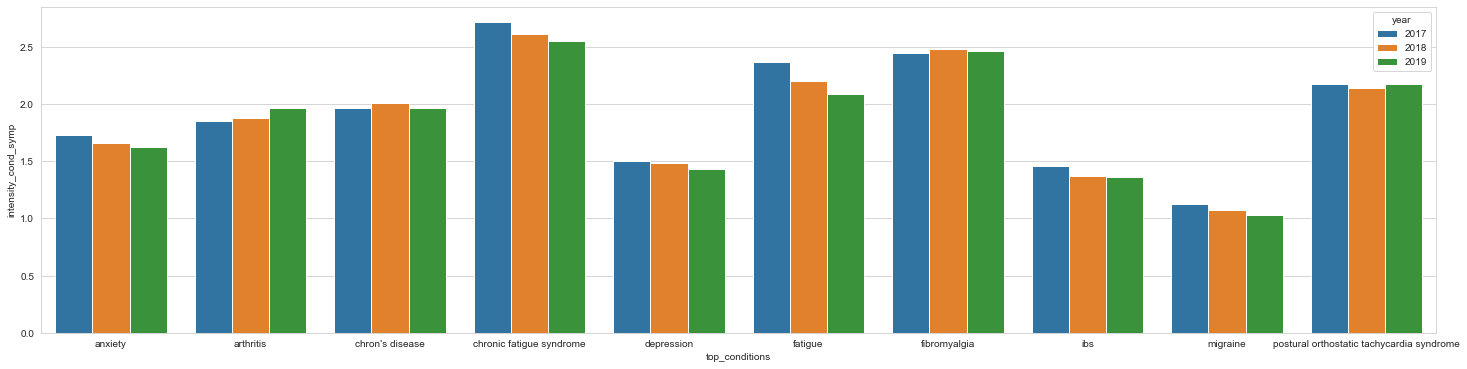

In [285]:
top_cond = df[df['top_conditions'] != 'Other']
top_cond = top_cond[top_cond['year'].isin([2017,2018,2019])]
top_cond_df = pd.DataFrame(top_cond.groupby(['year','top_conditions'])['intensity_cond_symp'].mean()).reset_index()

fig_dims = (25, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = top_cond_df.reset_index(), x = 'top_conditions', y = 'intensity_cond_symp', hue='year',ax=ax)

# CFS users exploration

<AxesSubplot:xlabel='Treatment', ylabel='max_intensity_per_day_'>

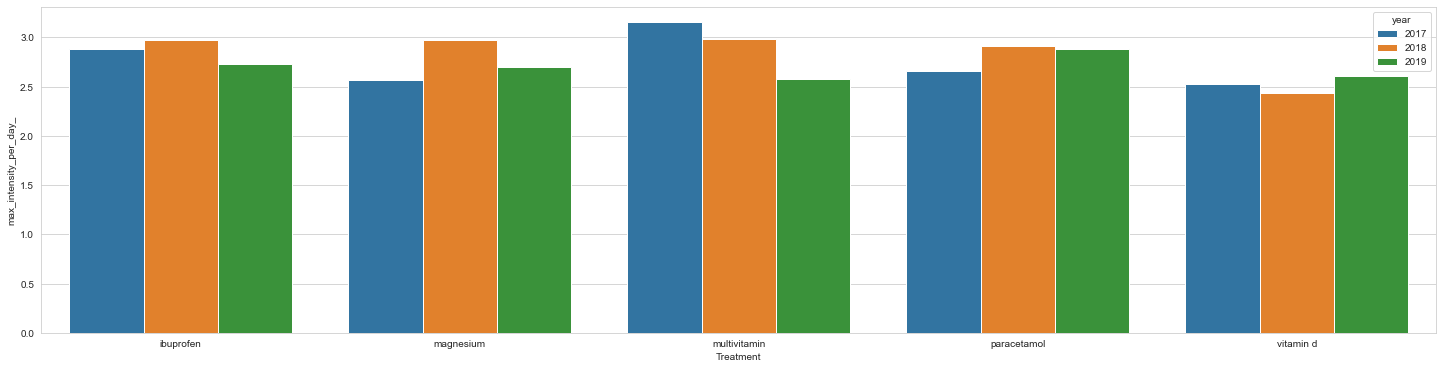

In [309]:
# Users with CFS have lower pain through the years.
# We can check the main treatments they have through the years and find there is no pattern
# because they continue having a similar amount except multivitamins.
user_cfs = set(df[df['top_conditions'] == 'chronic fatigue syndrome']['user_id'].values)
better_years = df[df['year'].isin([2017,2018,2019])]
better_years_user_cfs_df = better_years[better_years['user_id'].isin(user_cfs)]
better_years_user_cfs_df_treat = better_years_user_cfs_df[better_years_user_cfs_df['Treatment'].isin(['ibuprofen','multivitamin','magnesium','paracetamol','vitamin d'])]
better_years_user_cfs_df_treat_by_year = pd.DataFrame(better_years_user_cfs_df_treat.groupby(['year','Treatment'])['max_intensity_per_day_'].mean().reset_index())

fig_dims = (25, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = better_years_user_cfs_df_treat_by_year.reset_index(), x = 'Treatment', y = 'max_intensity_per_day_', hue='year',ax=ax)


In [315]:
list(better_years_user_cfs_df['Symptom'].value_counts().head(10).index)

['fatigue',
 'headache',
 'nausea',
 'brain fog',
 'abdominal pain',
 'joint pain',
 'back pain',
 'anxiety',
 'dizziness',
 'muscle pain']

<AxesSubplot:xlabel='Symptom', ylabel='max_intensity_per_day_'>

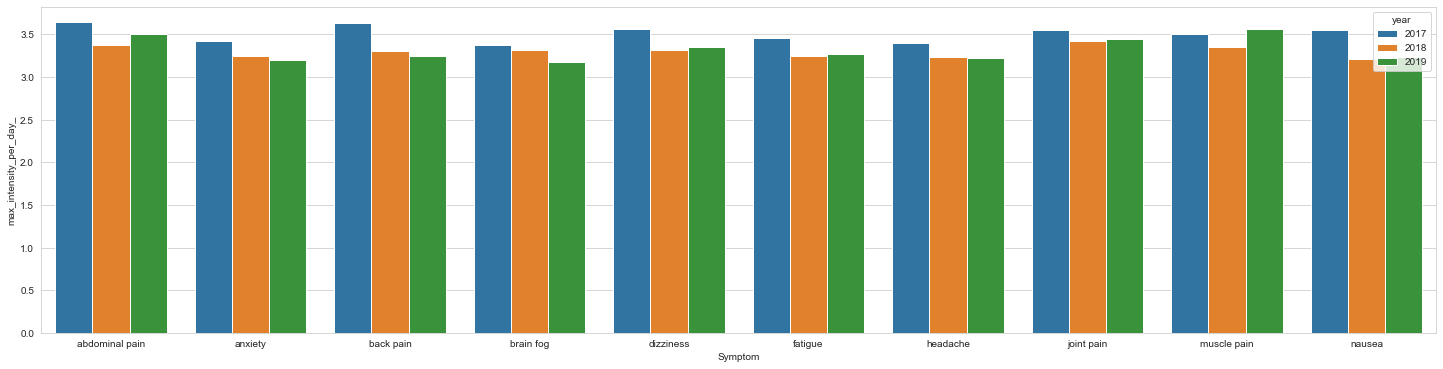

In [317]:
#we see some symptoms have reduced pain intensity: anxiety, back pain and brain fog.
symptoms_cfs = better_years_user_cfs_df[better_years_user_cfs_df['Symptom'].isin(list(better_years_user_cfs_df['Symptom'].value_counts().head(10).index))]
symptoms_cfs_by_year = pd.DataFrame(symptoms_cfs.groupby(['year','Symptom'])['max_intensity_per_day_'].mean().reset_index())

fig_dims = (25, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = symptoms_cfs_by_year.reset_index(), x = 'Symptom', y = 'max_intensity_per_day_', hue='year',ax=ax)


In [323]:
# mean age is 36.4
better_years_user_cfs_df.age.mean(), better_years_user_cfs_df.age.median()

(36.400953705743255, 35.0)

In [326]:
# they need too stay hidratated and awake and need sugar, maybe because they need energy.
better_years_user_cfs_df.Food.value_counts().head(5)

coffee       3117
water        2914
tea          1801
chocolate    1684
sugar        1574
Name: Food, dtype: int64

In [ ]:
##

In [382]:
# Users with CFS have lower pain through the years.
# We can check the main treatments they have through the years and find there is no pattern
# because they continue having a similar amount except multivitamins.
user_anx = set(df[df['top_conditions'] == 'anxiety']['user_id'].values)
user_anx_df = df[df['user_id'].isin(user_anx)]
user_anx_df.Food.value_counts().head(10)

water        7626
coffee       7111
tea          4184
chocolate    3945
sugar        2539
chicken      2255
milk         2009
pizza        1908
banana       1858
salad        1354
Name: Food, dtype: int64

In [ ]:
# the people with anxiety eats more sugar, coffee, fast food.

In [244]:
h17 = set(df[df['year'] == 2017]['user_id'].values)
h18 = set(df[df['year'] == 2018]['user_id'].values)
h19 = set(df[df['year'] == 2019]['user_id'].values)
intersection1 = h17.intersection(h18)
intersection2 = h19.intersection(intersection1)